In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn # nn contains all of PyTorch's building blocks for NN
torch.__version__

'2.1.0+cu121'

In [2]:
weight = 0.7
bias = 0.3
# liner regression
start = 0
end = 1
step = 0.02
x = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
# viasialization - first splitting data

train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(x_test), len(y_train)

(40, 10, 40)

In [11]:
def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data =x_test,
                    test_labels = y_test,
                    prediction=None):
  """
  Plots train, test data and compares prediction.
  """

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')

  plt.scatter(test_data, test_labels, c='g', s=4, label='test data')

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label="prediction data"
    )

  plt.legend(prop={'size' : 14})

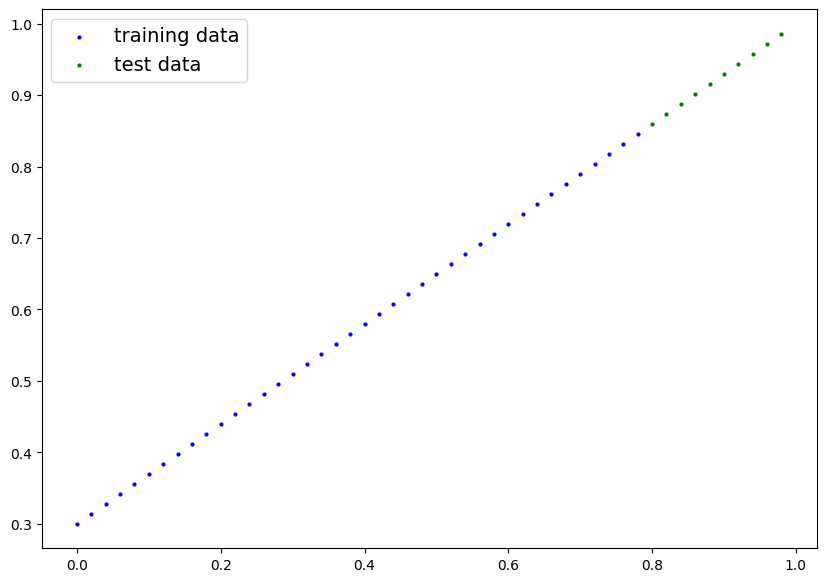

In [5]:
plot_prediction()

# lets create function using pytorch linear regression

## Trial model-0 to experiment

In [6]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward method to define compitation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias # Linerar regression formula

In [7]:
# creating random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel() # first model

print(list(model_0.parameters()),'\n') # model parameters

print(model_0.state_dict()) # List named parameteres

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) 10


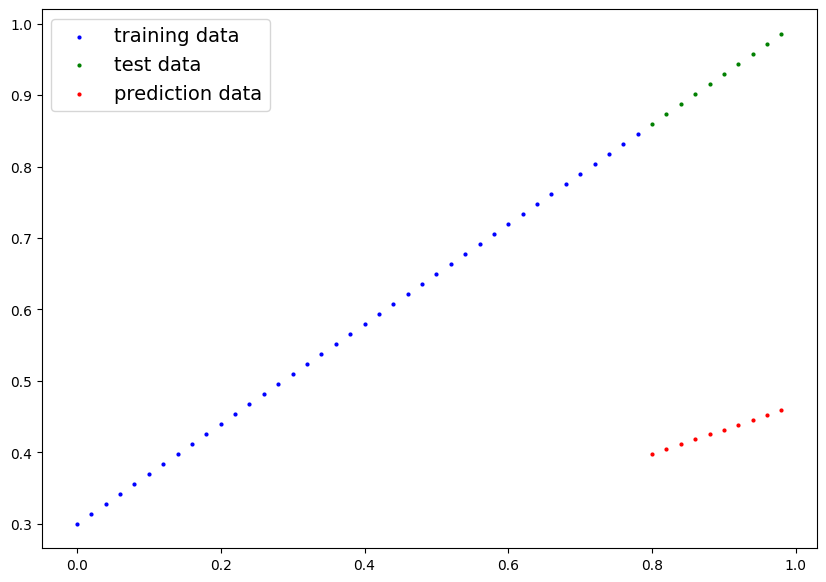

In [8]:
### Making prediction using `torch.inference_mode`
# with out training

with torch.inference_mode():
  y_pred = model_0(x_test)

print(y_pred, len(y_pred))

plot_prediction(prediction=y_pred) # plotting prediction without training
# prediction is worse as we did not train yet

In [9]:
# set up loss function and optimizer
torch.manual_seed(42)

loss_fn = torch.nn.L1Loss() # MAE loss

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [10]:
torch.manual_seed(42)

epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # set the model to training mode
  model_0.train()

  # forward pass
  y_pred = model_0(x_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad - Zero out the gradients
  optimizer.zero_grad()

  # perform backpropogation on the loss with respect to the parameters of model
  loss.backward()

  # step the optimizer ( perform gradient descent )
  optimizer.step()

  # Put the model in evaluation mode
  model_0.eval()  # turn off different setting in the model

  with torch.inference_mode():

    # do forward pass
    test_pred = model_0(x_test)

    # calculate test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    # print out model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [11]:
loss_values, test_loss_values
# we need to chage loss_value var as it has gradient and it will not allow to plot

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

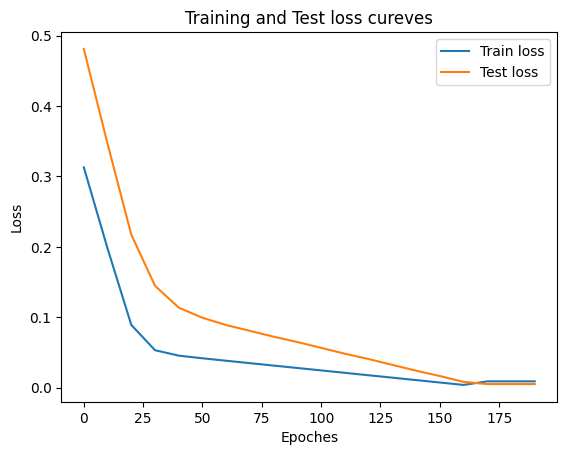

In [12]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and Test loss cureves")
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend()

In [13]:
with torch.inference_mode():
  y_pred_new = model_0(x_test)

In [14]:
weight, bias

(0.7, 0.3)

In [15]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

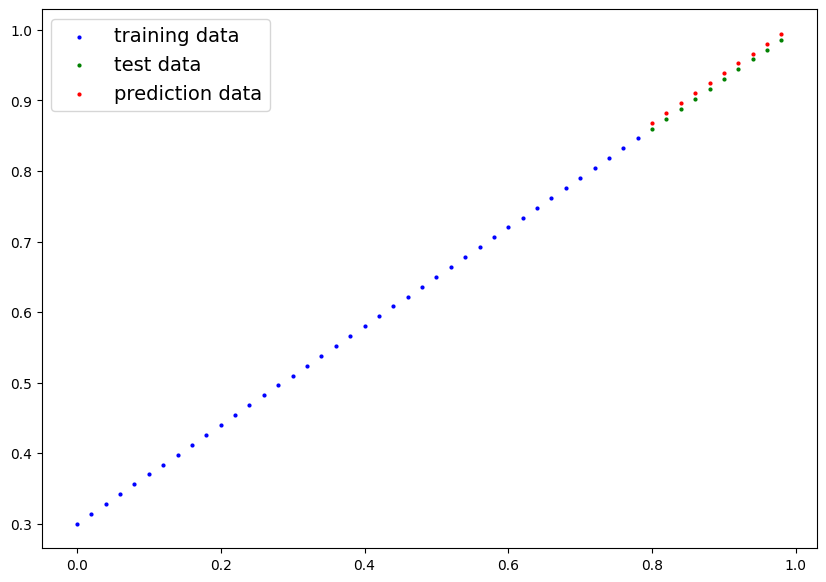

In [16]:
plot_prediction(prediction=y_pred_new)

Saving model in pytorch

In [17]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# model save path
MODEL_NAME = "1_pytoch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state_dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [19]:
# loading model
load_model_0 = LinearRegressionModel()
load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print(f'Model_0: {model_0.state_dict()}')
print(f'loaded_model_0: {load_model_0.state_dict()}')

Model_0: OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
loaded model_0: OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [20]:
load_model_0.eval()
with torch.inference_mode():
  load_model_pred = load_model_0(x_test)

load_model_pred == y_pred_new # same prediction values

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Model - 1 : putting all together

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [27]:
# create device-agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [28]:
# create data using linear regresion formula
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [29]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

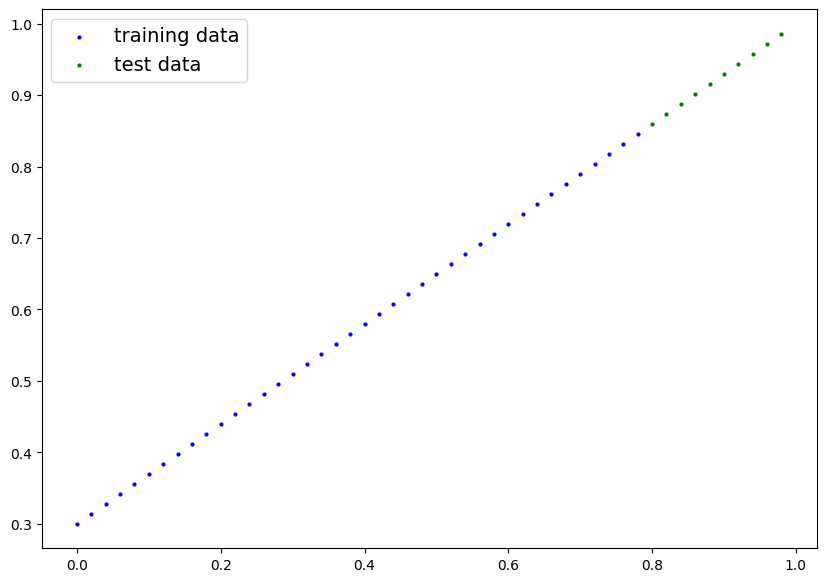

In [30]:
# plot data
plot_prediction(X_train, y_train, X_test, y_test)

In [31]:
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super(LinearRegressionModelV2, self).__init__()

    # use nn.Linear() for creating the model parameter
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1,
                                  bias=True,
                                  device=device)# assigning device cuda

  # forward method to define compitation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x) # Linerar regression layer

# setting manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.2259]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.9754], device='cuda:0'))]))

In [32]:
# check the model device
next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
## Training Model_1

loss_fn = torch.nn.L1Loss() # MAE loss

optimizer = torch.optim.SGD(params=model_1.parameters(), # params should of model_1
                            lr=0.01)

In [34]:
torch.manual_seed(42)

epochs = 1000

## PUT DATA on Target Device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  # set the model to training mode
  model_1.train()

  # 1.forward pass
  y_pred = model_1(X_train)

  # 2.calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3.optimizer zero grad - Zero out the gradients
  optimizer.zero_grad()

  # 4.perform backpropogation on the loss with respect to the parameters of model
  loss.backward()

  # 5.step the optimizer ( perform gradient descent )
  optimizer.step()

  # Put the model in evaluation mode
  model_1.eval()  # turn off different setting in the model

  with torch.inference_mode():

    # do forward pass
    test_pred = model_1(X_test)

    # calculate test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.49054595828056335 | Test Loss: 0.240034818649292
Epoch: 100 | Loss: 0.10459736734628677 | Test Loss: 0.240459606051445
Epoch: 200 | Loss: 0.07017435133457184 | Test Loss: 0.163229838013649
Epoch: 300 | Loss: 0.03582926094532013 | Test Loss: 0.08325198292732239
Epoch: 400 | Loss: 0.0014897867804393172 | Test Loss: 0.001909232116304338
Epoch: 500 | Loss: 0.002532674465328455 | Test Loss: 0.008408838883042336
Epoch: 600 | Loss: 0.002532674465328455 | Test Loss: 0.008408838883042336
Epoch: 700 | Loss: 0.002532674465328455 | Test Loss: 0.008408838883042336
Epoch: 800 | Loss: 0.002532674465328455 | Test Loss: 0.008408838883042336
Epoch: 900 | Loss: 0.002532674465328455 | Test Loss: 0.008408838883042336


In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6949]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2994], device='cuda:0'))])

In [36]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]], device='cuda:0')

In [40]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data =X_test,
                    test_labels = y_test,
                    prediction=None):
  """
  Plots train, test data and compares prediction.
  """

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')

  plt.scatter(test_data, test_labels, c='g', s=4, label='test data')

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label="prediction data"
    )

  plt.legend(prop={'size' : 14})

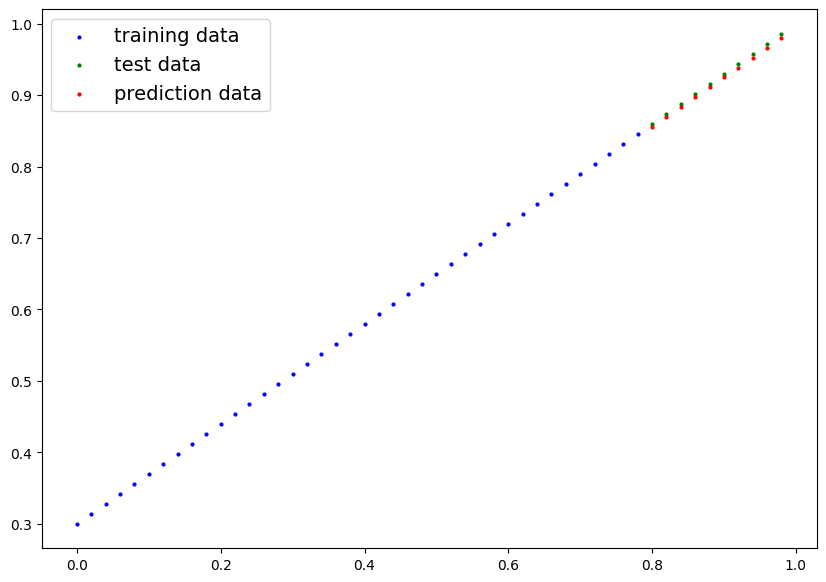

In [43]:
plot_prediction(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(),prediction = y_preds.cpu())

In [44]:
### saving and loading model 1
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# model save path
MODEL_NAME = "1_pytoch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state_dict
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [45]:
### Loading model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f'Model-1:{model_1.state_dict()}')
print(f'loaded Model-1:{loaded_model_1.state_dict()}')

Model-1:OrderedDict([('linear_layer.weight', tensor([[0.6949]], device='cuda:0')), ('linear_layer.bias', tensor([0.2994], device='cuda:0'))])
loaded Model-1:OrderedDict([('linear_layer.weight', tensor([[0.6949]], device='cuda:0')), ('linear_layer.bias', tensor([0.2994], device='cuda:0'))])


In [46]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_pred = loaded_model_1(X_test)

y_preds == loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')